In [1]:
# Exploring Brain Heterogeneity
import pandas as pd
from scipy.stats import ttest_ind, norm, kstest, spearmanr
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

%matplotlib inline
df = pd.read_csv("./Data/SoGoSurvey_LifeJournal Blog_2.csv")

Global Pain Perception
with Personality p_val:0.30997134385445757
with Gender, pval:0.0014400032343129129


Global Sound sensativity
with Personality p_val:4.9959846627583915e-06
with Gender, pval:1.5229737262731868e-09


Text(0.5, 1.0, "Spearman's correlations")

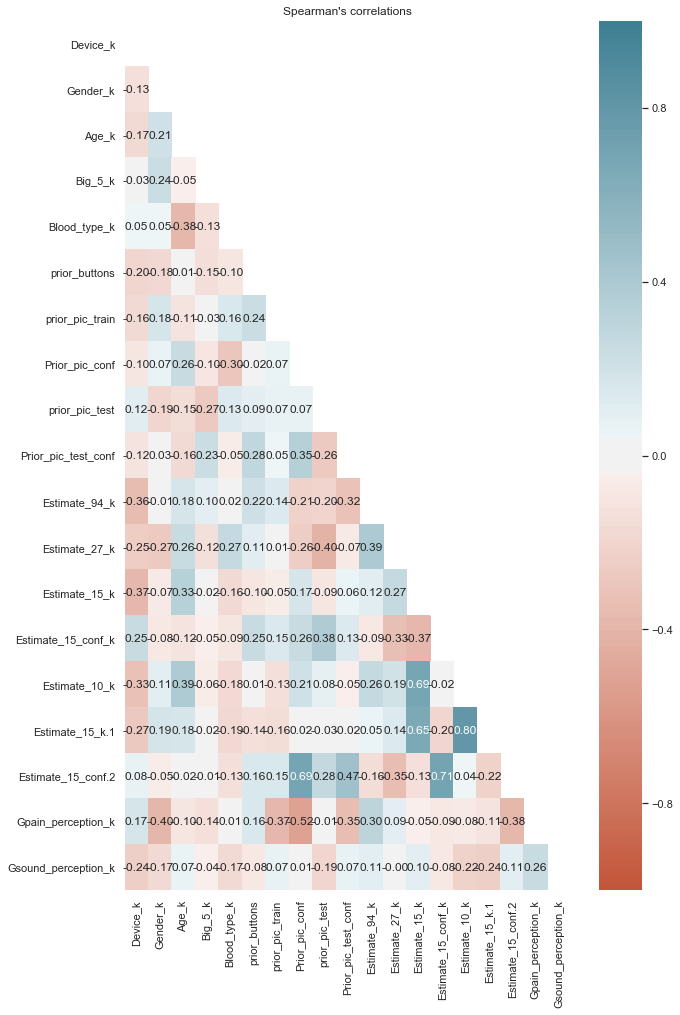

In [2]:
#testing global hypotheses

print('Global Pain Perception\nwith Personality p_val:{0}'.format(ttest_ind(df['Big_5_k'], df['Gpain_perception'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['prior_pic_test'], df['Gpain_perception'], equal_var=False)[1]))
#print('with Blood Type, pval:{0}'.format(ttest_ind(df['prior_2_test'], df['Gpain_perception'], equal_var=False)[1]))

print('\n\nGlobal Sound sensativity\nwith Personality p_val:{0}'.format(ttest_ind(df['Big_5_k'], df['Gsound_perception'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['prior_pic_test'], df['Gsound_perception'], equal_var=False)[1]))
#print('with Blood Type, pval:{0}'.format(ttest_ind(df['prior_2_test'], df['Gsound_perception'], equal_var=False)[1]))

plt.figure(figsize=(10, 16))
sns.set(style="white")
mask = np.triu(np.ones_like(df.iloc[:,50:].corr(), dtype=np.bool))
sns.heatmap(df.iloc[:,50:].corr(method="spearman"),cmap=sns.diverging_palette(20, 220, n=200),mask=mask,annot=True,fmt=".2f",vmax=1,vmin=-1)
plt.title("Spearman's correlations")

ttests for priors in numerosity judgement 
(1)Estimate Coins (94, 27) --> (x1^=75.4,x2^=25.2) pval:6.7701557619957e-10
with Personality, pval:1.2360652243493111e-18
with Gender, pval:4.987495626628363e-19
Kolmogorov–Smirnov test
2.569048525979802e-08
1.361676555141181e-08

(2)Estimate "_" lenght (15,10,15) x1^=12.00, x2^=8.82,x3^=14.70
confidence x1-69.27%, , confidence-x3:69.27%
Q1-> Q3 pval:0.053493172824919555
with personality, pval:1.0389070539016223e-11, confidence:64.15%
with Gender, pval:7.977280099164739e-13
Kolmogorov–Smirnov test
3.281172883141877e-08
1.7521478370461336e-08
8.836731857575527e-09


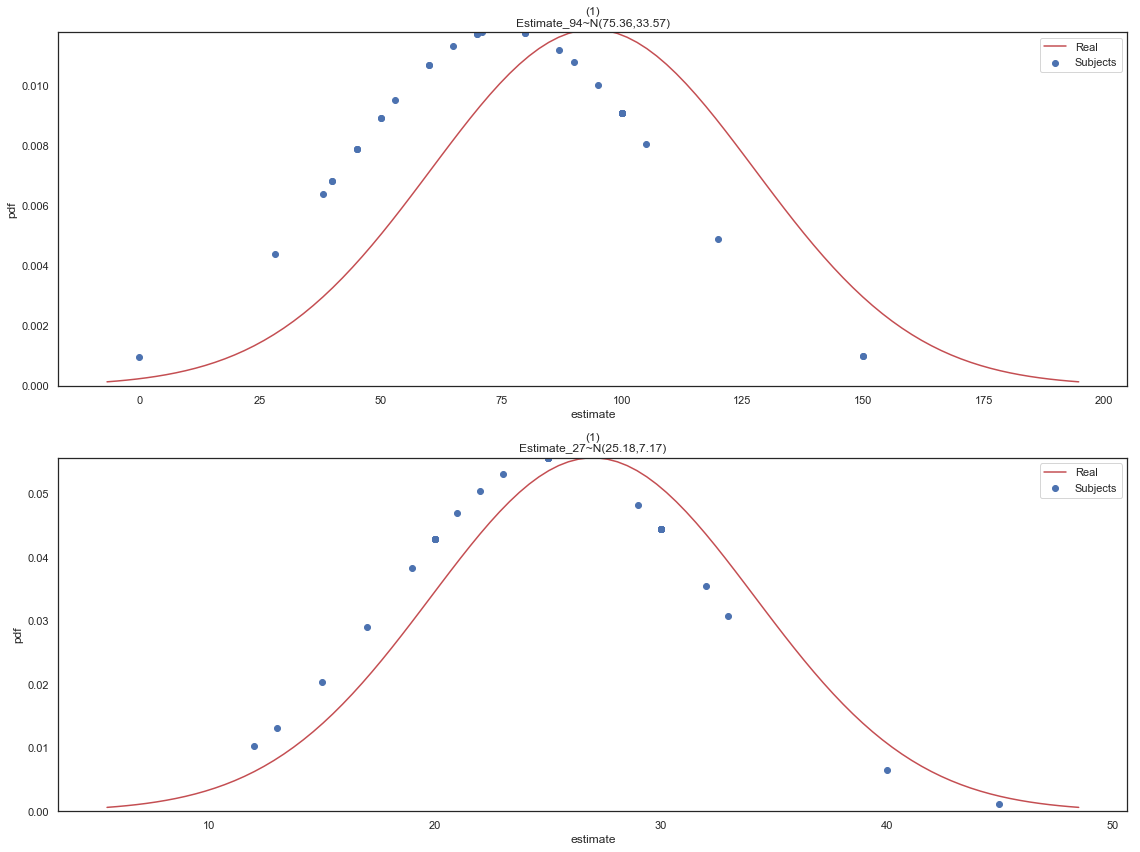

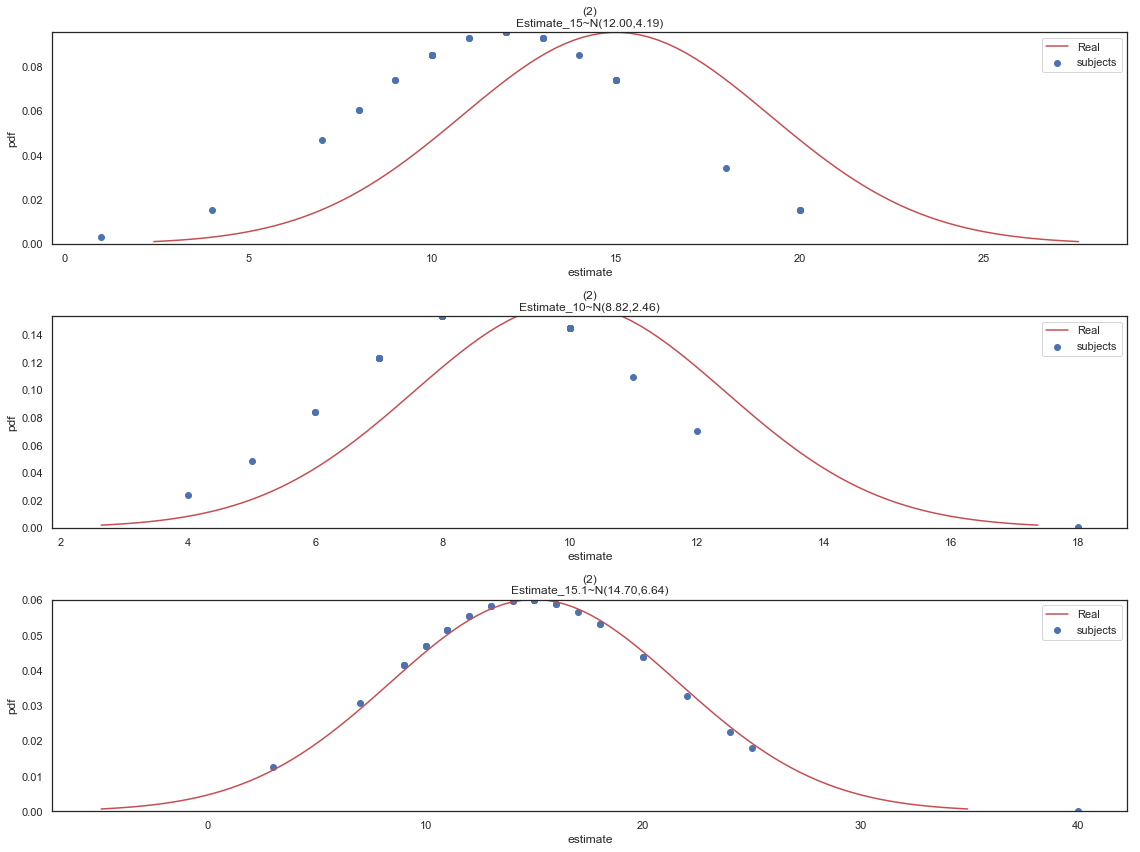

In [3]:
#numerosity judgement analysis
def plot_norm(mu,sigma,ax):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma),color='r',label='Real')

fig, ax = plt.subplots(figsize=(16,12), nrows=2, ncols=1)
qs = ['Estimate_94','Estimate_27']
for i,q in enumerate(qs):
    #ax[i].ahxline(y=val, color='black',label='Real')
    ax[i].scatter(df[q],norm.pdf(df[q], df[q].mean(),df[q].std()),label='Subjects')
    ax[i].set_title(f'(1)\n{q}~N({df[q].mean():.2f},{df[q].std():.2f})')
    ax[i].set_ylabel('pdf')
    ax[i].set_xlabel('estimate')
    ax[i].set_ylim([0,max(norm.pdf(df[q], df[q].mean(),df[q].std()))])
    plot_norm(int(q[9:11]),df[q].std(),ax[i])
    ax[i].legend()
plt.tight_layout()

print('ttests for priors in numerosity judgement \n(1)Estimate Coins (94, 27) --> (x1^={0:.1f},x2^={1:.1f}) pval:{2}'.format(df['Estimate_94'].mean(),df['Estimate_27'].mean(),ttest_ind(df['Estimate_94'], df['Estimate_27'], equal_var=False)[1]))
print('with Personality, pval:{0}'.format(ttest_ind(df['Estimate_27'], df['Big_5_k'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['Estimate_27'], df['Gender_k'], equal_var=False)[1]))
print('Kolmogorov–Smirnov test')
print(kstest(norm.cdf(df["Estimate_94"].values, loc=df["Estimate_94"].mean(), scale=df["Estimate_94"].std()),'norm')[1])
print(kstest(norm.cdf(df["Estimate_27"].values, loc=df["Estimate_27"].mean(), scale=df["Estimate_27"].std()),'norm')[1])

fig, axes = plt.subplots(figsize=(16,12), nrows=3, ncols=1)
qs = ['Estimate_15','Estimate_10','Estimate_15.1']
for i,q in enumerate(qs):
    #ax[i].ahxline(y=val, color='black',label='Real')
    axes[i].scatter(df[q],norm.pdf(df[q], df[q].mean(),df[q].std()),label='subjects')
    axes[i].set_title(f'(2)\n{q}~N({df[q].mean():.2f},{df[q].std():.2f})')
    axes[i].set_ylabel('pdf')
    axes[i].set_xlabel('estimate')
    axes[i].set_ylim([0,max(norm.pdf(df[q], df[q].mean(),df[q].std()))])
    plot_norm(int(q[9:11]),df[q].std(),axes[i])
    axes[i].legend()
plt.tight_layout()
    
print('\n(2)Estimate "_" lenght (15,10,15) x1^={0:.2f}, x2^={1:.2f},x3^={2:.2f}\nconfidence x1-{3:.2f}%, , confidence-x3:{4:.2f}%'.format(df['Estimate_15'].mean(),df['Estimate_10'].mean(),df['Estimate_15.1'].mean(),df['Estimate_15_conf_k'].mean()*100,df['Estimate_15_conf'].mean()*100))
print('Q1-> Q3 pval:{0}'.format(ttest_ind(df['Estimate_15.1'], df['Estimate_15'], equal_var=False)[1],df['Estimate_15_conf.1'].mean()*100))
print('with personality, pval:{0}, confidence:{1:.2f}%'.format(ttest_ind(df['Estimate_15.1'], df['Big_5_k'], equal_var=False)[1],df['Estimate_15_conf.1'].mean()*100))
print('with Gender, pval:{0}'.format(ttest_ind(df['Estimate_15.1'], df['Gender_k'], equal_var=False)[1]))
print('Kolmogorov–Smirnov test')
print(kstest(norm.cdf(df["Estimate_15"].values, loc=df["Estimate_15"].mean(), scale=df["Estimate_15"].std()),'norm')[1])
print(kstest(norm.cdf(df["Estimate_10"].values, loc=df["Estimate_10"].mean(), scale=df["Estimate_10"].std()),'norm')[1])
print(kstest(norm.cdf(df["Estimate_15.1"].values, loc=df["Estimate_15.1"].mean(), scale=df["Estimate_15.1"].std()),'norm')[1])



#print('with Blood Type, pval:{0}'.format(ttest_ind(df['Estimate_27'], df['Blood_type'], equal_var=False)[1]))
#print('with Device, pval:{0}'.format(ttest_ind(df['Estimate_27'], df['Device_k'], equal_var=False)[1]))

#print('with Blood Type, pval:{0}'.format(ttest_ind(df['Estimate_15.1'], df['Blood_type'], equal_var=False)[1]))
#print('with Device, pval:{0}'.format(ttest_ind(df['Estimate_15.1'], df['Device_k'], equal_var=False)[1]))



In [4]:
#Priors Analysis
#print(f"self-description:{df['Self_other'].value_counts(normalize=True).values[0]*100:.2f}%")
#big_f = df['Big_5_k'].value_counts(normalize=True).values *100
#print(f'C->{big_f[0]:.2f}%,A->{big_f[1]:.2f}%,N->{big_f[2]:.2f}%,E->{big_f[3]:.2f}%,O->{big_f[4]:.2f}%')

print('ttests for visual priors:\n(1) - buttons')
print(df['prior_buttons'].value_counts(normalize=True))
print('\nwith Personality p_val:{0}'.format(ttest_ind(df['Big_5_k'], df['prior_buttons'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['prior_buttons'], df['Gender_k'], equal_var=False)[1]))
#print('with Blood Type, pval:{0}'.format(ttest_ind(df['prior_2_train'], df['Blood_type'], equal_var=False)[1]))
#print('with Device, pval:{0}'.format(ttest_ind(df['prior_2_train'], df['Device_k'], equal_var=False)[1]))
      
print('\n(2) - pic train block tower')
print(df['prior_pic_train'].value_counts(normalize=True))
print('confidence: {0:.2f}%'.format(df['Prior_pic_conf'].mean()*100))

print('\nwith Personality p_val:{0}'.format(ttest_ind(df['Big_5_k'], df['prior_pic_train'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['prior_pic_train'], df['Gender_k'], equal_var=False)[1]))
#print('with Blood Type, pval:{0}'.format(ttest_ind(df['prior_1'], df['Blood_type'], equal_var=False)[1]))
#print('with Device, pval:{0}'.format(ttest_ind(df['prior_1'], df['Device_k'], equal_var=False)[1]))
      
print('\n(3) - pic test person')
print(df['prior_pic_test'].value_counts(normalize=True))
print('confidence: {0:.2f}%'.format(df['Prior_pic_conf'].mean()*100))

print('\nwith Personality p_val:{0}'.format(ttest_ind(df['Big_5_k'], df['Prior_pic_test_conf'], equal_var=False)[1]))
print('with Gender, pval:{0}'.format(ttest_ind(df['prior_pic_test'], df['Gender_k'], equal_var=False)[1]))
#print('with Blood Type, pval:{0}'.format(ttest_ind(df['prior_2_test'], df['Blood_type'], equal_var=False)[1]))
#print('with Device, pval:{0}'.format(ttest_ind(df['prior_2_test'], df['Device_k'], equal_var=False)[1]))



ttests for visual priors:
(1) - buttons
2    0.636364
1    0.363636
Name: prior_buttons, dtype: float64

with Personality p_val:3.107103656910343e-06
with Gender, pval:0.4603350592098798

(2) - pic train block tower
1    0.787879
2    0.212121
Name: prior_pic_train, dtype: float64
confidence: 68.79%

with Personality p_val:9.487814513822544e-09
with Gender, pval:0.00478962693550949

(3) - pic test person
1    0.606061
4    0.151515
2    0.151515
3    0.090909
Name: prior_pic_test, dtype: float64
confidence: 68.79%

with Personality p_val:5.0822862626492576e-11
with Gender, pval:0.2698309851870478


In [ ]:
'''
qs = df.columns
q_labels = ['N', 'StartTime', 'EndTime', 'Consent', 'LiveJournal', 'Steam',
       'Facebook', 'Instagram', 'Twitter', 'Tumblr', 'QZone', 'Baidu Tieba',
       'Tencent QQ', 'Other social networks', 'DOI1', 'DOI2', 'DOI3',
       'Dependable', 'Critical', 'Calm', 'Extraverted',
       'Open to new experiences', 'Disorganized', 'Conventional',
       'Sympathetic', 'Anxious', 'Reserved', 'Estimate_15', 'Estimate_15_conf',
       'Prior_1_train', 'Prior_1_conf', 'Prior_2', 'Attention', 'Estimate_94',
       'Estimate_27', 'Estimate_10', 'Prior_1_test', 'Prior_1_test_conf',
       'Estimate_15.1', 'Estimate_15_conf.1', 'Self_other', 'Disorders',
       'Btype', 'Gpain_perception', 'Gsound_perception', 'Age', 'City',
       'Country', 'Gender', 'Device', 'Big_5_k', 'prior_1', 'prior_2_train',
       'prior_2_test', 'Blood_type', 'Gender_k', 'Device_k']



#label data points
for j,s in enumerate(df[q]):
   ax[i].annotate(f'{s}',(j, norm.pdf(s)))'
   
sns.set(style="white")
plt.figure(figsize=(10, 16))
mask = np.triu(np.ones_like(df.iloc[:,50:].corr(), dtype=np.bool))
sns.heatmap(df.iloc[:,50:].corr(method="pearson"),cmap="YlGnBu",mask=mask,annot=True,fmt=".2f",vmax=1,vmin=-1)
plt.title("Pearson's correlations")

'''